*(Código de notebook para actualizar cambios en otros ficheros)*

In [3]:
%load_ext autoreload
%autoreload 2

<h1 style="font-size: 48px; color: #4682B4; font-family: 'Times New Roman', serif; text-align: center;">
        PRÁCTICA Nº 3: ALGORITMOS GENÉTICOS
</h1>

---

In [4]:
from ClasificadorAlgoritmoGenetico import ClasificadorAlgoritmoGenetico
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple
import matplotlib.pyplot as plt
import numpy as np

def tasa_error(tam_poblacion=50, num_generaciones=100, prob_cruce=0.8,
        prob_mut=0.1, max_reglas=5,
        prop_elitismo=5, logs=True):
        
    dataset1 = 'titanic'

    # Cargar datos usando la clase Datos
    datos_titanic = Datos(nombreFichero=f'ConjuntosDatosP3/{dataset1}.csv', print_val=False)

    # Separar atributos y clase directamente desde self.datos
    X = datos_titanic.datos[:, :-1]  # Todas las columnas excepto la última
    y = datos_titanic.datos[:, -1]   # Solo la última columna (clase)

    # Convertir a enteros (si no están en este formato)
    X = X.astype(int)
    y = y.astype(int)

    # Valores únicos por atributo ajustados
    valores_por_atributo = [X[:, i].max() + 1 for i in range(X.shape[1])]

    # Configurar el clasificador
    clasificador = ClasificadorAlgoritmoGenetico(
        tam_poblacion=50, num_generaciones=100, prob_cruce=0.8,
        prob_mut=0.1, max_reglas=5, valores_por_atributo=valores_por_atributo,
        prop_elitismo=5, logs=logs
    )

    # Validación simple
    vs = ValidacionSimple(proporcionTrain=0.8)
    particiones = vs.creaParticiones(datos_titanic)

    # Entrenamiento y evaluación
    for particion in particiones:
        # Extraer los datos de entrenamiento y prueba
        datos_train = datos_titanic.extraeDatos(particion.indicesTrain)
        datos_test = datos_titanic.extraeDatos(particion.indicesTest)

        # Entrenar el clasificador
        clasificador.entrenamiento(datos_train[:, :-1], datos_train[:, -1])
        
        # Clasificar los datos de prueba
        predicciones = clasificador.clasifica(datos_test[:, :-1])

        # Calcular tasa de error
        error = clasificador.error(datos_test, predicciones)
        
        return error



In [5]:
from ClasificadorAlgoritmoGenetico import ClasificadorAlgoritmoGenetico
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple
import matplotlib.pyplot as plt
import numpy as np

def mejor_individuo(tam_poblacion=50, num_generaciones=100, prob_cruce=0.8,
        prob_mut=0.1, max_reglas=5,
        prop_elitismo=5, logs=True):
        
    dataset1 = 'titanic'

    # Cargar datos usando la clase Datos
    datos_titanic = Datos(nombreFichero=f'ConjuntosDatosP3/{dataset1}.csv', print_val=False)

    # Separar atributos y clase directamente desde self.datos
    X = datos_titanic.datos[:, :-1]  # Todas las columnas excepto la última
    y = datos_titanic.datos[:, -1]   # Solo la última columna (clase)

    # Convertir a enteros (si no están en este formato)
    X = X.astype(int)
    y = y.astype(int)

    # Valores únicos por atributo ajustados
    valores_por_atributo = [X[:, i].max() + 1 for i in range(X.shape[1])]

    # Configurar el clasificador
    clasificador = ClasificadorAlgoritmoGenetico(
        tam_poblacion=50, num_generaciones=100, prob_cruce=0.8,
        prob_mut=0.1, max_reglas=5, valores_por_atributo=valores_por_atributo,
        prop_elitismo=5, logs=logs
    )

    # Validación simple
    vs = ValidacionSimple(proporcionTrain=0.8)
    particiones = vs.creaParticiones(datos_titanic)

    # Entrenamiento y evaluación
    for particion in particiones:
        # Extraer los datos de entrenamiento y prueba
        datos_train = datos_titanic.extraeDatos(particion.indicesTrain)
        datos_test = datos_titanic.extraeDatos(particion.indicesTest)

        # Entrenar el clasificador
        clasificador.entrenamiento(datos_train[:, :-1], datos_train[:, -1])
        return clasificador.mejor_individuo



-----

<h2 style="font-size: 48px; color: #D84A6A; font-family: 'Times New Roman', serif; text-align: left;">
        Preguntas
</h2>

# Apartado 1
## Breve descripción de algunos detalles de la implementación:
- ### Mecanismo de cruce implementado
> ##### El cruce se realiza mediante un cruce en un punto entre dos individuos:
> - Se selecciona un punto de cruce al azar dentro de la longitud mínima de los dos individuos.
> - Los fragmentos anteriores al punto se toman del primer padre, y los posteriores, del segundo.
> - Resultado: Dos nuevos individuos con combinaciones de las reglas de los padres.

- ### Mecanismo de Mutación
> ##### La mutación sigue un enfoque de mutación puntual:
> - Cada bit en una regla tiene una probabilidad prob_mut de mutar.
> - La mutación invierte el bit: un 0 se convierte en 1 y viceversa.

# Apartado 2
## Cálculo de los resultados


In [ ]:
# Parametros a variar
tam_poblacion_list = [50, 75, 100]
num_generaciones_list = [50, 75, 100]
elitismo_list = [5, 10]
num_reglas_list = [5, 10]

lista_resultados = []

for tam_poblacion in tam_poblacion_list:
    for num_generaciones in num_generaciones_list:
        for elitismo in elitismo_list:
            for num_reglas in num_reglas_list:
                error = tasa_error(tam_poblacion=tam_poblacion, num_generaciones=num_generaciones,
                                    prop_elitismo=elitismo, max_reglas=num_reglas, logs=False)
                lista_resultados.append([tam_poblacion, num_generaciones, elitismo, num_reglas, error])
                

print(lista_resultados)


##### Debido a que tarda apoximadamente 30 minutos, recojo los datos de una ejecución y analizo esos datos:

In [7]:
import pandas as pd

# Crear el DataFrame
data = np.array([[50, 50, 5, 5, 0.2344], [50, 50, 5, 10, 0.1818], [50, 50, 10, 5, 0.2009], 
                 [50, 50, 10, 10, 0.2057], [50, 75, 5, 5, 0.2009], [50, 75, 5, 10, 0.2392], 
                 [50, 75, 10, 5, 0.2105], [50, 75, 10, 10, 0.2440], [50, 100, 5, 5, 0.2201], 
                 [50, 100, 5, 10, 0.2249], [50, 100, 10, 5, 0.1770], [50, 100, 10, 10, 0.2631], 
                 [75, 50, 5, 5, 0.2392], [75, 50, 5, 10, 0.2297], [75, 50, 10, 5, 0.2440], 
                 [75, 50, 10, 10, 0.2201], [75, 75, 5, 5, 0.2488], [75, 75, 5, 10, 0.2201], 
                 [75, 75, 10, 5, 0.2057], [75, 75, 10, 10, 0.2297], [75, 100, 5, 5, 0.2009], 
                 [75, 100, 5, 10, 0.2297], [75, 100, 10, 5, 0.1866], [75, 100, 10, 10, 0.3062], 
                 [100, 50, 5, 5, 0.2153], [100, 50, 5, 10, 0.2297], [100, 50, 10, 5, 0.2679], 
                 [100, 50, 10, 10, 0.2009], [100, 75, 5, 5, 0.2201], [100, 75, 5, 10, 0.2201], 
                 [100, 75, 10, 5, 0.2297], [100, 75, 10, 10, 0.2249], [100, 100, 5, 5, 0.2584], 
                 [100, 100, 5, 10, 0.2727], [100, 100, 10, 5, 0.2057], [100, 100, 10, 10, 0.2057]])

# Convertir los datos a un DataFrame
df = pd.DataFrame(data, columns=["Tamaño Población", "Generaciones", "Elitismo", "Reglas", "Error"])

# Ordenar el DataFrame por la columna de 'Error' de menor a mayor y seleccionar las 10 filas con menor error
top_10_combinations = df.sort_values(by="Error").head(10)

# Mostrar las 10 combinaciones con menor error
print(top_10_combinations)


    Tamaño Población  Generaciones  Elitismo  Reglas   Error
10              50.0         100.0      10.0     5.0  0.1770
1               50.0          50.0       5.0    10.0  0.1818
22              75.0         100.0      10.0     5.0  0.1866
4               50.0          75.0       5.0     5.0  0.2009
20              75.0         100.0       5.0     5.0  0.2009
27             100.0          50.0      10.0    10.0  0.2009
2               50.0          50.0      10.0     5.0  0.2009
3               50.0          50.0      10.0    10.0  0.2057
18              75.0          75.0      10.0     5.0  0.2057
35             100.0         100.0      10.0    10.0  0.2057


Se puede concluir que la mejor convinación es:
- Tamaño Población: 50
- Numero de generaciones: 100
- Elitismo: 10%
- Maximo de reglas: 5

In [8]:
individuo = mejor_individuo(tam_poblacion=50, num_generaciones=100, prop_elitismo=10, max_reglas=5, logs=False)
print('Reglas del mejor individuo:')
for regla in individuo:
    print(f'    - {regla}')

Reglas del mejor individuo:
    - 11101001111111111111001
    - 11111111111001110011100
    - 01100010111101011000010
    - 01111101101111000101000
    - 01100100101110011100011


# Apartado 3
## Análisis de los resultados

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12836\1553236794.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tamaño Población", y="Error", data=df, palette="Set3")


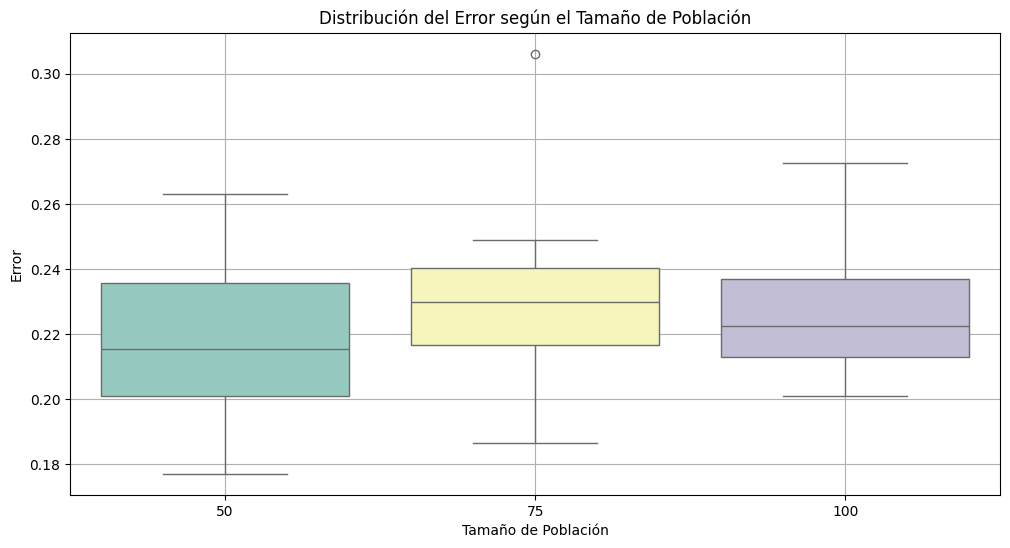

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Resultados del algoritmo genético
data = [
    [50, 50, 5, 5, 0.2344], [50, 50, 5, 10, 0.1818], [50, 50, 10, 5, 0.2009], [50, 50, 10, 10, 0.2057],
    [50, 75, 5, 5, 0.2009], [50, 75, 5, 10, 0.2392], [50, 75, 10, 5, 0.2105], [50, 75, 10, 10, 0.2440],
    [50, 100, 5, 5, 0.2201], [50, 100, 5, 10, 0.2249], [50, 100, 10, 5, 0.1770], [50, 100, 10, 10, 0.2631],
    [75, 50, 5, 5, 0.2392], [75, 50, 5, 10, 0.2297], [75, 50, 10, 5, 0.2440], [75, 50, 10, 10, 0.2201],
    [75, 75, 5, 5, 0.2488], [75, 75, 5, 10, 0.2201], [75, 75, 10, 5, 0.2057], [75, 75, 10, 10, 0.2297],
    [75, 100, 5, 5, 0.2009], [75, 100, 5, 10, 0.2297], [75, 100, 10, 5, 0.1866], [75, 100, 10, 10, 0.3062],
    [100, 50, 5, 5, 0.2153], [100, 50, 5, 10, 0.2297], [100, 50, 10, 5, 0.2679], [100, 50, 10, 10, 0.2009],
    [100, 75, 5, 5, 0.2201], [100, 75, 5, 10, 0.2201], [100, 75, 10, 5, 0.2297], [100, 75, 10, 10, 0.2249],
    [100, 100, 5, 5, 0.2584], [100, 100, 5, 10, 0.2727], [100, 100, 10, 5, 0.2057], [100, 100, 10, 10, 0.2057]
]

# Convertimos los resultados en un DataFrame para facilitar el análisis
columns = ["Tamaño Población", "Generaciones", "Elitismo", "Reglas", "Error"]
df = pd.DataFrame(data, columns=columns)

# Generamos el boxplot: Tamaño de la Población vs Error
plt.figure(figsize=(12, 6))
sns.boxplot(x="Tamaño Población", y="Error", data=df, palette="Set3")
plt.title("Distribución del Error según el Tamaño de Población")
plt.xlabel("Tamaño de Población")
plt.ylabel("Error")
plt.grid(True)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12836\231963004.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y="Error", data=df, palette="Set3")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12836\231963004.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y="Error", data=df, palette="Set3")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12836\231963004.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y="Error", data=df, palette="Set3")


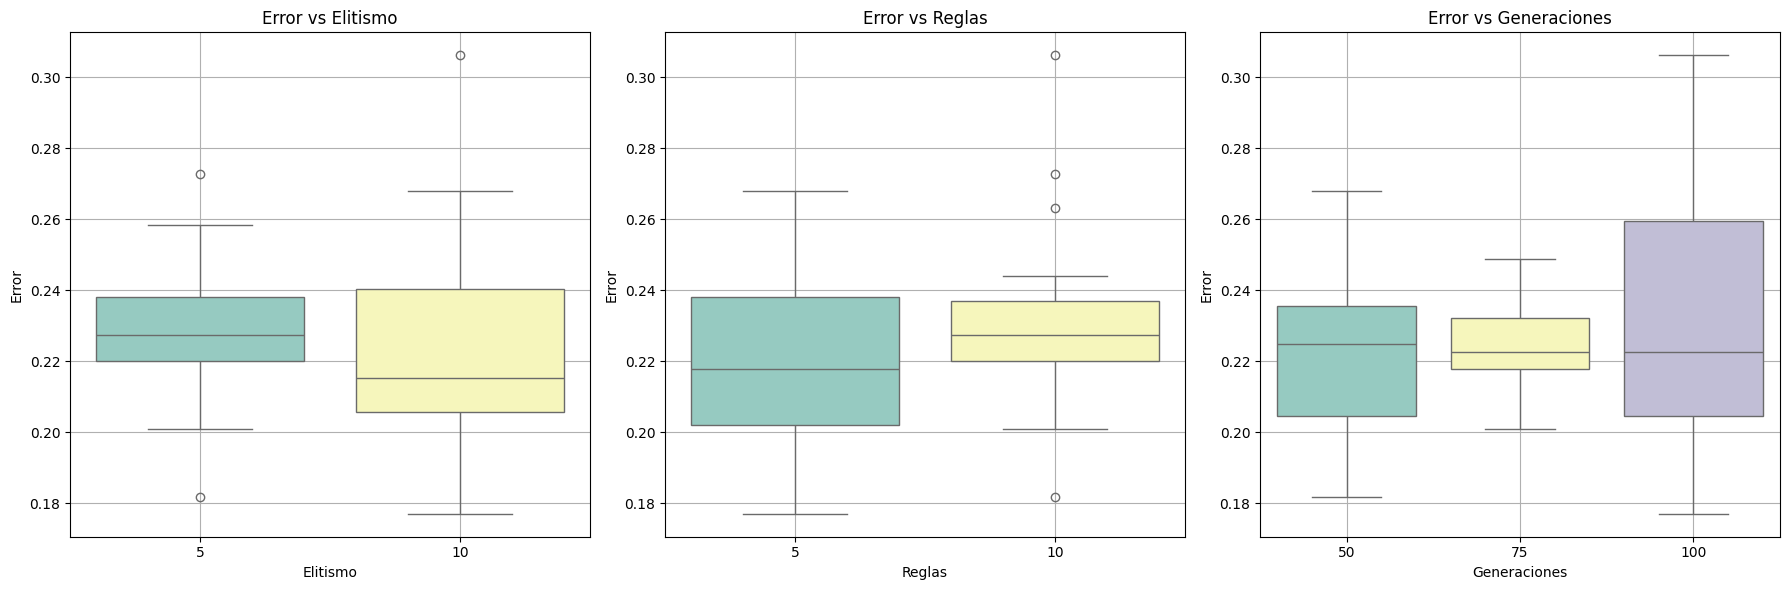

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Resultados del algoritmo genético
data = [
    [50, 50, 5, 5, 0.2344], [50, 50, 5, 10, 0.1818], [50, 50, 10, 5, 0.2009], [50, 50, 10, 10, 0.2057],
    [50, 75, 5, 5, 0.2009], [50, 75, 5, 10, 0.2392], [50, 75, 10, 5, 0.2105], [50, 75, 10, 10, 0.2440],
    [50, 100, 5, 5, 0.2201], [50, 100, 5, 10, 0.2249], [50, 100, 10, 5, 0.1770], [50, 100, 10, 10, 0.2631],
    [75, 50, 5, 5, 0.2392], [75, 50, 5, 10, 0.2297], [75, 50, 10, 5, 0.2440], [75, 50, 10, 10, 0.2201],
    [75, 75, 5, 5, 0.2488], [75, 75, 5, 10, 0.2201], [75, 75, 10, 5, 0.2057], [75, 75, 10, 10, 0.2297],
    [75, 100, 5, 5, 0.2009], [75, 100, 5, 10, 0.2297], [75, 100, 10, 5, 0.1866], [75, 100, 10, 10, 0.3062],
    [100, 50, 5, 5, 0.2153], [100, 50, 5, 10, 0.2297], [100, 50, 10, 5, 0.2679], [100, 50, 10, 10, 0.2009],
    [100, 75, 5, 5, 0.2201], [100, 75, 5, 10, 0.2201], [100, 75, 10, 5, 0.2297], [100, 75, 10, 10, 0.2249],
    [100, 100, 5, 5, 0.2584], [100, 100, 5, 10, 0.2727], [100, 100, 10, 5, 0.2057], [100, 100, 10, 10, 0.2057]
]

# Convertimos los resultados en un DataFrame para facilitar el análisis
columns = ["Tamaño Población", "Generaciones", "Elitismo", "Reglas", "Error"]
df = pd.DataFrame(data, columns=columns)

# Creamos una lista de características para analizar
features = ["Elitismo", "Reglas", "Generaciones"]

# Graficamos un boxplot para cada característica
plt.figure(figsize=(18, 6))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=feature, y="Error", data=df, palette="Set3")
    plt.title(f"Error vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Error")
    plt.grid(True)

plt.tight_layout()
plt.show()


##### - Tamaño de población: Por la gráfica se podría decir que, a mayor tamaño, menos variación hay en los resultados, concentrándose la mayoría de resultados más. Por otro lado, los resultados más bajos se obtienen con tamaño de población 50. Para esta muestra se obtienen mejores datos con tamaño 50. Para todos los casos (peores, mejores y medios) es mejor tamaño 50 que 100; el único punto a favor de 100 es que está más concentrado y genera datos más "estables".
##### - Proporción de elitismo: Se obtiene mejor resultado medio para 10, aunque más disperso, y el caso peor es un poco peor que el de 5.
##### - Número de reglas: Muy parecido al resultado de elitismo, pero para 5. Es mejor para 5 que para 10, pero es más disperso.
##### - Número de generaciones: El menor error es para 100 en el caso mejor. El más estable es 75, pero donde más se concentran los buenos resultados es en el de 50.

# Apartado 4
## Gráfica del fitness del mejor individuo y del fitness medio de la población

In [12]:
def plot_evolucion_fitness(tam_poblacion=50, num_generaciones=100, prob_cruce=0.8,
        prob_mut=0.1, max_reglas=5,
        prop_elitismo=5, logs=True):
        
    dataset1 = 'titanic'

    # Cargar datos usando la clase Datos
    datos_titanic = Datos(nombreFichero=f'ConjuntosDatosP3/{dataset1}.csv', print_val=False)

    # Separar atributos y clase directamente desde self.datos
    X = datos_titanic.datos[:, :-1]  # Todas las columnas excepto la última
    y = datos_titanic.datos[:, -1]   # Solo la última columna (clase)

    # Convertir a enteros (si no están en este formato)
    X = X.astype(int)
    y = y.astype(int)

    # Valores únicos por atributo ajustados
    valores_por_atributo = [X[:, i].max() + 1 for i in range(X.shape[1])]

    # Configurar el clasificador
    clasificador = ClasificadorAlgoritmoGenetico(
        tam_poblacion=50, num_generaciones=100, prob_cruce=0.8,
        prob_mut=0.1, max_reglas=5, valores_por_atributo=valores_por_atributo,
        prop_elitismo=5, logs=logs
    )

    # Validación simple
    vs = ValidacionSimple(proporcionTrain=0.8)
    particiones = vs.creaParticiones(datos_titanic)

    # Entrenamiento y evaluación
    for particion in particiones:
        # Extraer los datos de entrenamiento y prueba
        datos_train = datos_titanic.extraeDatos(particion.indicesTrain)
        datos_test = datos_titanic.extraeDatos(particion.indicesTest)

        # Entrenar el clasificador
        clasificador.entrenamiento(datos_train[:, :-1], datos_train[:, -1])

        # Clasificar los datos de prueba
        predicciones = clasificador.clasifica(datos_test[:, :-1])

        # Calcular tasa de error
        error = clasificador.error(datos_test, predicciones)
        
    # Entrenar el clasificador
    clasificador.entrenamiento(datos_train[:, :-1], datos_train[:, -1])

    # Graficar evolución del fitness
    plt.plot(clasificador.fitness_mejor, label="Mejor fitness")
    plt.plot(clasificador.fitness_promedio, label="Fitness promedio")
    plt.xlabel("Generaciones")
    plt.ylabel("Fitness")
    plt.legend()
    plt.title("Evolución del Fitness")
    plt.show()


### Valores por defecto

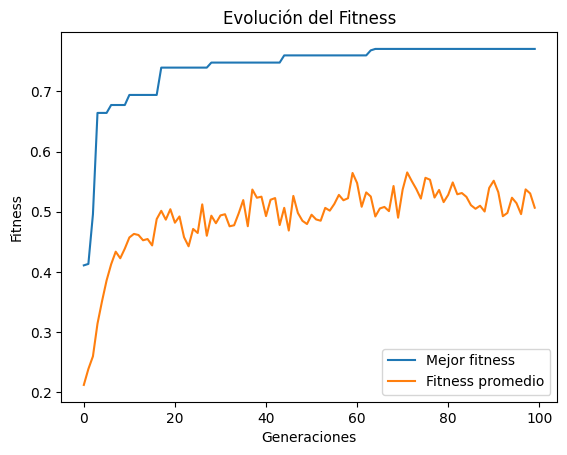

In [13]:
plot_evolucion_fitness(logs=False)

### Mejores valores de error obtenidos

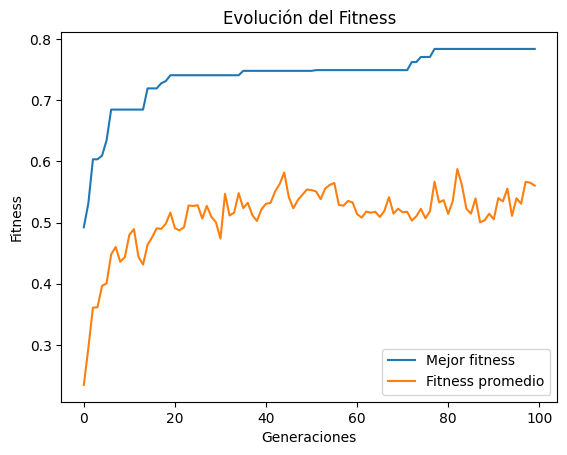

In [14]:
plot_evolucion_fitness(tam_poblacion=50, num_generaciones=100, prop_elitismo=10, max_reglas=5, logs=False)

##### Se nota una mejora sobre todo en el fitness medio y en el comienzo del firness del mejor (este empieza mucho mejor que el anterior), aunque no hay mucha diferencia